### 학습목표

경사하강법(Gradient descent)에 대해 더 자세히 알아본다.

### 핵심키워드

가설 함수(Hypothesis Function)

평균 제곱 오차(Mean Squared Error)

경사하강법(Gradient descent)

In [1]:
! pip install  torchvision

In [2]:
import numpy as np
import torch

In [3]:
# Dummy data : Input = Output

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [4]:
#Simpler Hypothesis Function

W = torch.zeros(1, requires_grad = True)

# b = torch.zeros(1, requires_grad = True)

hypothesis = x_train * W

In [10]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<MulBackward0>)


#### 최고의 모델

- H(x) = x

- W =1이 가장 좋은 숫자

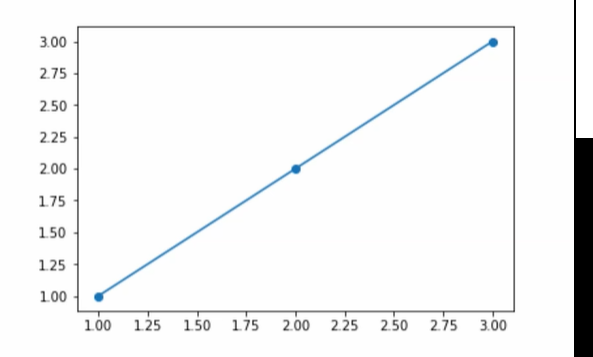

##### Cost function: Intuition

위의 함수를 통해서 모델 예측값이 실제 데이터와 얼마나 다른지 나타낼 수 있게 성능 점검이 가능합니다.

- W = 1, cost = 0

- 1에서 멀어질수록 높아진다.

- cost가 낮을수록 학습이 잘된 것이다

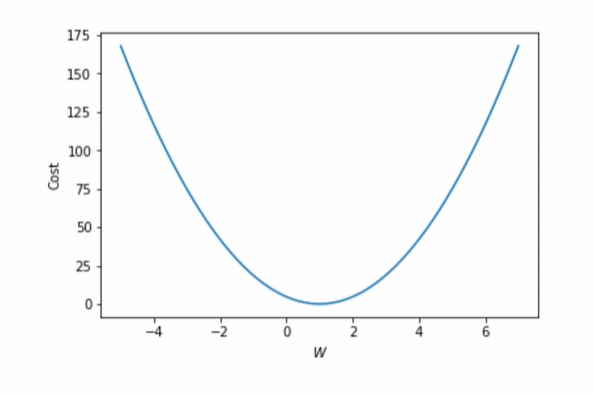

##### Cost function: MSE

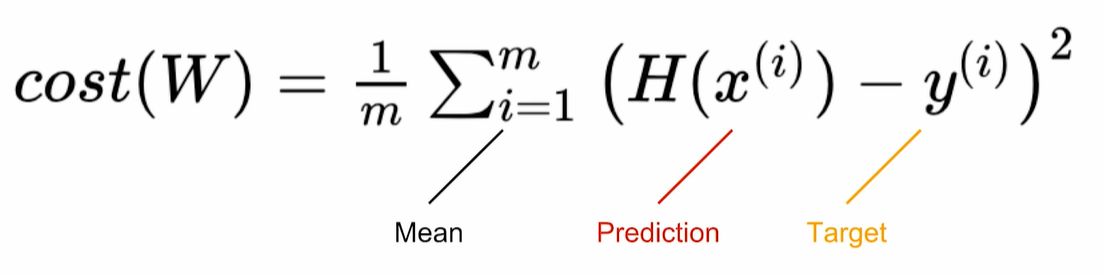


In [5]:
cost = torch.mean((hypothesis - y_train) ** 2)

In [9]:
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


#### Gradient Descent: Intuition

- 곡선으로 내려가기

- 기울기가 크면 더 멀리

- Gradient 계산

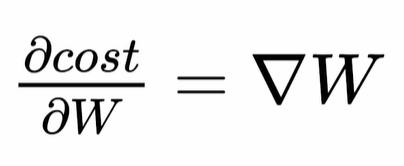

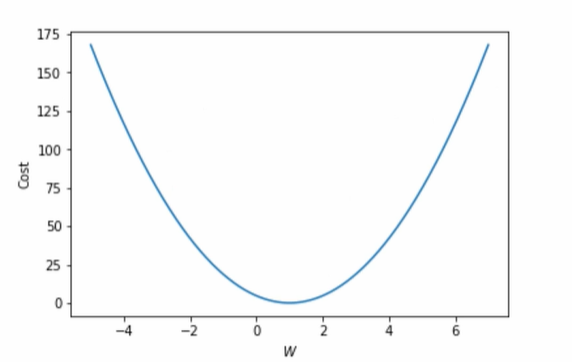

이를 통해 cost function최소화

- 기울기 음수, W 키우기

- 기울기 양수, W 감소

- 기울기 가파름, cost크므로 W크게 바꾸기

- 기울기가 평평할수록, cost는 0에 가까우므로 W를 조금 바꾸기 

<br>

##### Gradient Descent: The Math

*간단한 미분*

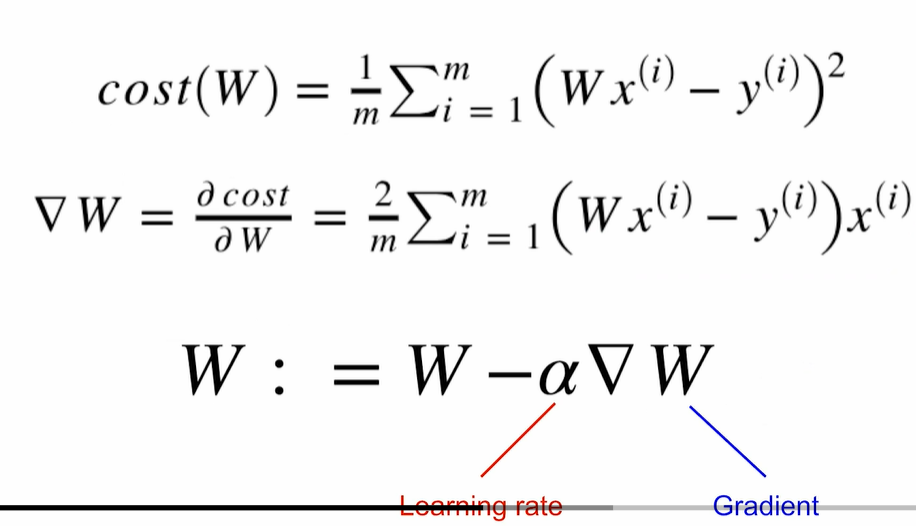




##### Gradient Descent: Code

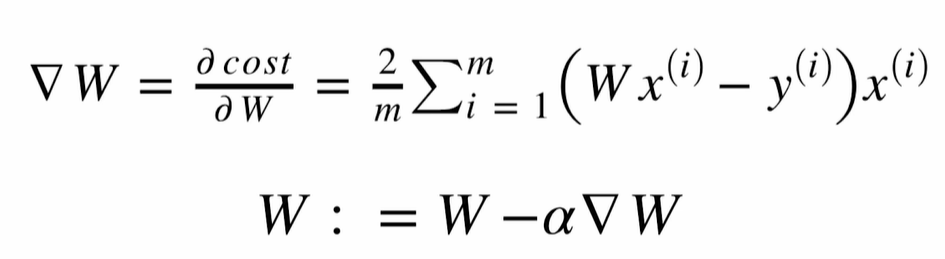

- 알파는 lr

In [6]:
gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
lr = 0.1
W = torch.tensor([1.0, 2.0, 3.0]) # leaf variable
W -= lr * gradient

#에러: 값을 지정하지 않고 빼려고 했기 때문입니다.
#RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

#해결: 값을 지정하니 됨

print(W)

tensor([1.9333, 2.9333, 3.9333], grad_fn=<SubBackward0>)


#### GD with torch.optim

- torch.optim를 이용하여 GD하기

   - Optimizer정의
   
   - optimizer.zero_grad()로 gradient = 0초기화
   
   - cost.backward()로 gradient계산
   
   - optimizer.step()으로 gd

In [7]:
#optimizer설정(학습 가능한 변수와 learning weight알아야함)
W = torch.tensor([1.0, 2.0, 3.0]) # leaf variable
optimizer = torch.optim.SGD([W], lr=0.15)

#cost로 H(x)계산

#W의 gradient저장

#W의 값을 gradient에 맞게 업데이트


optimizer.zero_grad() # optimizer저장되어 있는 모든 학습 가능한 변수의 gradient를 0으로 초기화

cost.backward() #cost function미분 후 각 변수의 gradient채우기
optimizer.step() #저장된 gradient값으로 gd실행




In [8]:
print(W)

tensor([1., 2., 3.])


Pytorch는 leaf variable이 없으면 optimizer도 안된다.
